## Imports

In [53]:
import pandas as pd
import numpy as np
import seaborn as sns

## 1. Reading The Dataset

In [5]:
df = pd.read_csv('players.csv')
display(df)

,ID,Name,FullName,Age,Height,Weight,PhotoUrl,Nationality,Overall,Potential,...,LMRating,CMRating,RMRating,LWBRating,CDMRating,RWBRating,LBRating,CBRating,RBRating,GKRating
0,158023,L. Messi,Lionel Messi,33,170,72,https://cdn.sofifa.com/players/158/023/21_60.png,Argentina,93,93,...,93,90,93,69,68,69,65,55,65,22
1,20801,Cristiano Ronaldo,C. Ronaldo dos Santos Aveiro,35,187,83,https://cdn.sofifa.com/players/020/801/21_60.png,Portugal,92,92,...,91,84,91,68,64,68,64,57,64,23
2,200389,J. Oblak,Jan Oblak,27,188,87,https://cdn.sofifa.com/players/200/389/21_60.png,Slovenia,91,93,...,38,41,38,35,39,35,35,36,35,92
3,192985,K. De Bruyne,Kevin De Bruyne,29,181,70,https://cdn.sofifa.com/players/192/985/21_60.png,Belgium,91,91,...,91,91,91,82,83,82,78,72,78,24
4,190871,Neymar Jr,Neymar da Silva Santos Jr.,28,175,68,https://cdn.sofifa.com/players/190/871/21_60.png,Brazil,91,91,...,91,86,91,70,65,70,65,52,65,23
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19015,257371,M. Nzongong,Mike Nzongong,19,179,74,https://cdn.sofifa.com/players/257/371/21_60.png,Republic of Ireland,49,60,...,51,47,51,44,42,44,42,40,42,18
19016,259160,L. Bell,Lewis Bell,17,181,70,https://cdn.sofifa.com/players/259/160/21_60.png,England,49,67,...,51,44,51,42,38,42,41,35,41,13
19017,259157,Y. Arai,Yasin Arai,16,176,70,https://cdn.sofifa.com/players/259/157/21_60.png,England,49,74,...,53,47,53,45,40,45,44,39,44,17
19018,253763,R. Dinanga,Ricardo Dinanga,18,174,73,https://cdn.sofifa.com/players/253/763/21_60.png,Republic of Ireland,49,59,...,49,43,49,36,32,36,34,30,34,16


## 2. Missing Values

In [6]:
all_rows = df.isna().sum()
missing_ones = all_rows[all_rows[:] != 0]
print(missing_ones)

ClubPosition          234
ContractUntil         234
ClubNumber            234
NationalPosition    17895
NationalNumber      17895
dtype: int64


## 3. Mean, Max and Min Weights

In [7]:
print("Min:", df["Weight"].min())
print("Max:", df["Weight"].max())
print("Mean:", df["Weight"].mean())

Min: 50
Max: 110
Mean: 75.05241850683491


## 4. Most/Least Common Nationality

In [8]:
nationality_count = df['Nationality'].value_counts()
nationality_count.head(1).append(nationality_count.tail(1))

England      1706
Indonesia       1
Name: Nationality, dtype: int64

## 5. Promissing Players

In [9]:
display(df.loc[(df['Potential'] > 84) & (df['Growth'] > 4)][['ID', 'FullName', 'Potential', 'Growth']])

,ID,FullName,Potential,Growth
12,231747,Kylian Mbappé,95,5
45,231281,Trent Alexander-Arnold,92,5
46,233049,Jadon Sancho,93,6
68,222492,Leroy Sané,90,5
70,228702,Frenkie de Jong,90,5
...,...,...,...,...
10650,251873,Yusuf Demir,86,21
12472,247649,Jarrad Branthwaite,85,22
12798,256781,Luca Netz,85,22
14022,259419,Takuhiro Nakai,86,24


## 6. Plotting Promissing Players' Best Position

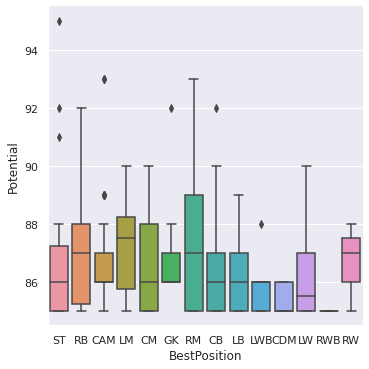

In [54]:
data = df.loc[(df['Potential'] > 84) & (df['Growth'] > 4)][['BestPosition', 'Potential']]
sns.catplot(x="BestPosition", y="Potential", kind="box", data=data)

## 7. Best Club (With The Most Promissing Players)

In [10]:
display(df.loc[(df['Potential'] > 84) & (df['Growth'] > 4)][['Club']].value_counts().head(1))

Club       
Sporting CP    10
dtype: int64

## 8. Sum of Overal of Promissing Players in Chelsea

In [11]:
display(df.loc[(df['Potential'] > 84) & (df['Growth'] > 4) & (df['Club'] == 'Chelsea')][['Overall']].sum())

Overall    623
dtype: int64

## 9. Players ContractUntil=2021 and Nationality != NationalTeam

In [12]:
print(len(df.loc[(df['ContractUntil'] == 2021) & (df['Nationality'] != df['NationalTeam'])]))

6728


## 10. Mehdi Taremi	

In [14]:
display(df.loc[(df['Name'] == 'M. Taremi')].head(1)[['Name', 'FullName', 'Club', 'Overall', 'WageEUR']])

,Name,FullName,Club,Overall,WageEUR
1017,M. Taremi,Mehdi Taremi,FC Porto,77,16000
